In [1]:
import pandas as pd

### Creating data
There are two core objects in pandas: the DataFrame and the Series

#### DataFrame 
It is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.

In [2]:
pd.DataFrame({'Yes':[50,21], 'No': [131,2]})

,Yes,No
0,50,131
1,21,2


In [3]:
pd.DataFrame({'Bob':['I liked it.','It was awful.'], 'Sue': ['Pretty good.', "Bland"]})

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland


The dictionary-list constructor assigns values to the column labels, but just uses an ascending count from 0 (0, 1, 2, 3, ...) for the row labels. Sometimes this is OK, but oftentimes we will want to assign these labels ourselves.

The list of row labels used in a DataFrame is known as an Index. We can assign values to it by using an index parameter in our constructor:

In [4]:
pd.DataFrame({'Bob':['I like it.', 'It was awful'],'Sue':['Pretty good', 'Blad']},index=['Product A', 'Product B'])

,Bob,Sue
Product A,I like it.,Pretty good
Product B,It was awful,Blad


#### Series
A Series, by contrast, is a sequence of data values. If a DataFrame is a table, a Series is a list. And in fact you can create one with nothing more than a list:

In [5]:
pd.Series([1,2,3,4,5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

A Series is, in essence, a single column of a DataFrame. So you can assign row labels to the Series the same way as before, using an index parameter. However, a Series does not have a column name, it only has one overall name:

In [6]:
pd.Series([30,35,40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

### Reading data files
Being able to create a DataFrame or Series by hand is handy. But, most of the time, we won't actually be creating our own data by hand. Instead, we'll be working with data that already exists.

Data can be stored in any of a number of different forms and formats. By far the most basic of these is the humble CSV file. When you open a CSV file you get something that looks like this:

In [10]:
iris_review = pd.read_csv('iris.txt', delimiter='\t')
#We can use the shape attribute to check how large the resulting DataFrame is:
iris_review.shape

(150, 5)

We can examine the contents of the resultant DataFrame using the head() command, which grabs the first five rows:

In [11]:
iris_review.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### Example:
## Powerlifters Database
#### Context
This dataset is a snapshot of the OpenPowerlifting database as of April 2019. OpenPowerlifting is creating a public-domain archive of powerlifting history. Powerlifting is a sport in which competitors compete to lift the most weight for their class in three separate barbell lifts: the Squat, Bench, and Deadlift.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df1 = pd.read_csv('dataset/meets.csv')

In [44]:
df1.shape

(8482, 8)

In [45]:
df1.head(2)

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic


In [46]:
df1["Date"] = pd.to_datetime(df1['Date'])

In [47]:
df1['Month'] = df1['Date'].apply(lambda x:x.month)
df1['Year'] = df1['Date'].apply(lambda x:x.year)

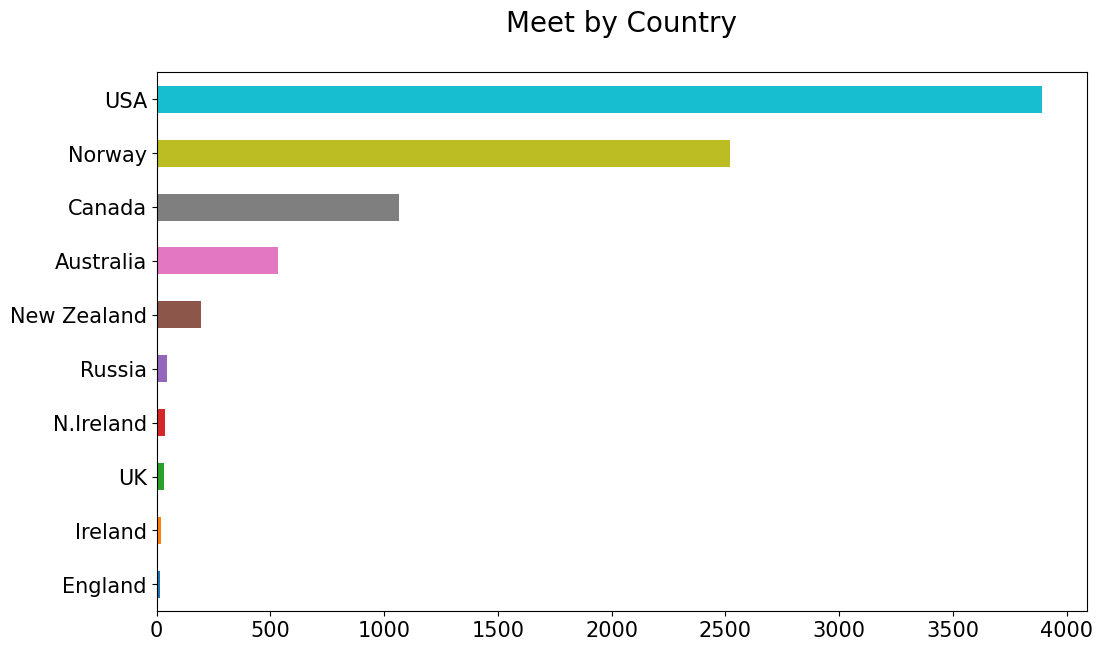

Meets by Country:

USA            3894
Norway         2521
Canada         1066
Australia       532
New Zealand     195
Russia           43
N.Ireland        36
UK               34
Ireland          21
England          16
Name: MeetCountry, dtype: int64


In [50]:

plt.figure(figsize=(12,7))
df1['MeetCountry'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh', color=['C0','C1','C2','C3', 'C4','C5','C6','C7','C8','C9'])

plt.title('Meet by Country\n', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

print('Meets by Country:\n')
print(df1['MeetCountry'].value_counts()[:10])


U.S.A. is number one. Not too surprising to know Americans have the most meets, considering the population and economy of the United States. However, meets per capita of Norway, Canada, Australia and New Zealand are all higher than the United States.

In [52]:
#Current country populations, as of January 1, 2020

USPop = 331002651
NORWAYPop = 5421241
CANADAPop = 37742154
AUSTRALIAPop = 25499884
NEWZEALANDPop = 4822233


perCapDict = {'United States': len(df1[df1['MeetCountry']=='USA']) / USPop * 100000,
            'Norway': len(df1[df1['MeetCountry']=='Norway']) / NORWAYPop * 100000,
            'Canada': len(df1[df1['MeetCountry']=='Canada']) / CANADAPop * 100000,
            'Australia': len(df1[df1['MeetCountry']=='Australia']) / AUSTRALIAPop * 100000,
            'New Zealand': len(df1[df1['MeetCountry']=='New Zealand']) / NEWZEALANDPop * 100000}

perCapDf = pd.Series(perCapDict)



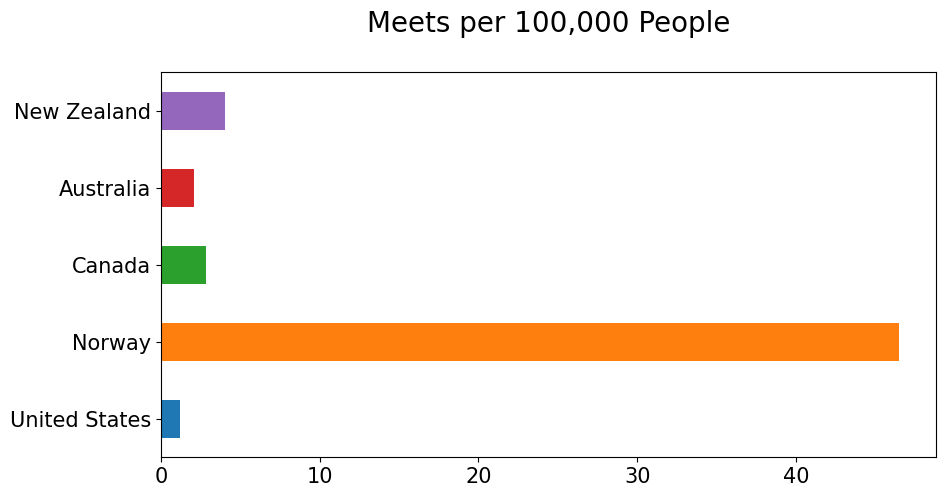

Meets per 100,000 People

United:  1.18
Norway:  46.5
Canada:  2.82
Austra:  2.09
New Ze:  4.04


In [55]:
plt.figure(figsize=(10,5))
perCapDf.plot(kind='barh', color=['C0','C1','C2','C3', 'C4'])
plt.title('Meets per 100,000 People\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Meets per 100,000 People\n')
for k,v in perCapDict.items():
    print(k[:6] + ': ',(round(v,2)))

Wow, Norway really seems to standout as a weightlifting nation!

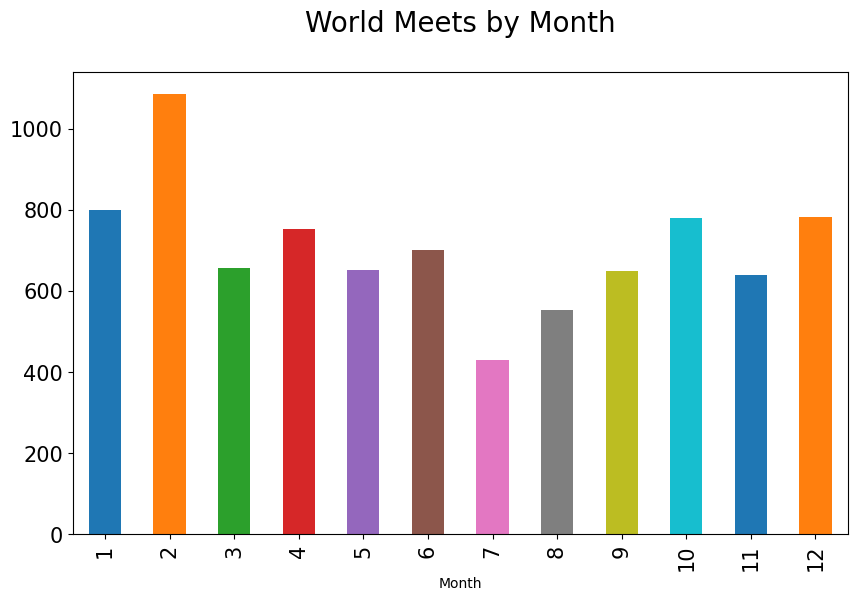

Month
1      800
2     1085
3      656
4      753
5      652
6      702
7      430
8      552
9      650
10     781
11     639
12     782
Name: Month, dtype: int64


In [57]:
plt.figure(figsize=(10,6))
df1.groupby(['Month'])['Month'].count().plot(kind='bar',color=['C0','C1','C2','C3', 'C4','C5','C6','C7','C8','C9','C10','C11'])
plt.title('World Meets by Month\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print(df1.groupby(['Month'])['Month'].count())

Seems that weightlifting meets is more practiced in February

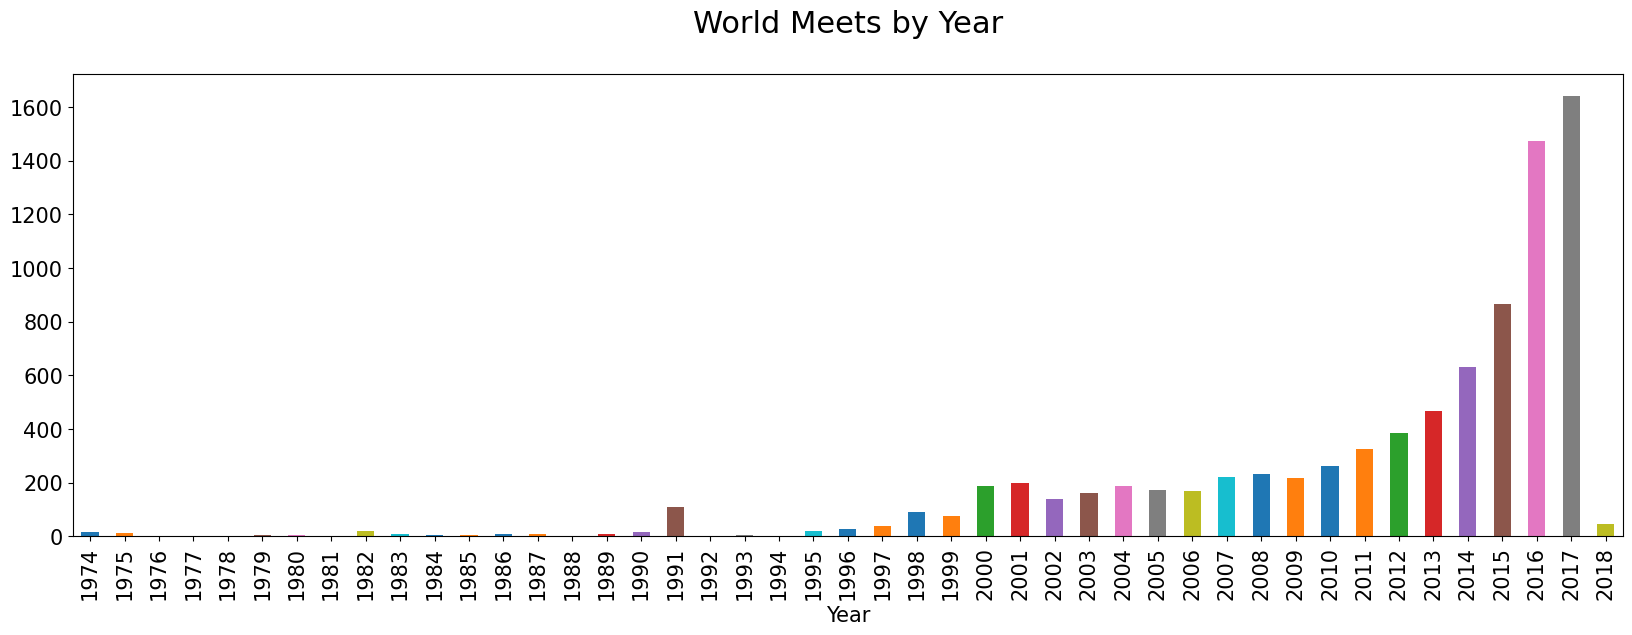

In [62]:
plt.figure(figsize=(20,6))
df1.groupby(['Year'])['Year'].count().plot(kind='bar',color=['C0','C1','C2','C3', 'C4','C5','C6','C7','C8','C9','C10','C11'])
plt.title('World Meets by Year\n',fontsize=22)
plt.xlabel('Year',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Seems that weightlifting as a sport has growth considerably.

## Data Cleaning and Processing

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('dataset/openpowerlifting.csv')

/tmp/ipykernel_573/427694692.py:5: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/openpowerlifting.csv')


In [2]:
df.shape

(1423354, 37)

In [3]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


#### Missing Data

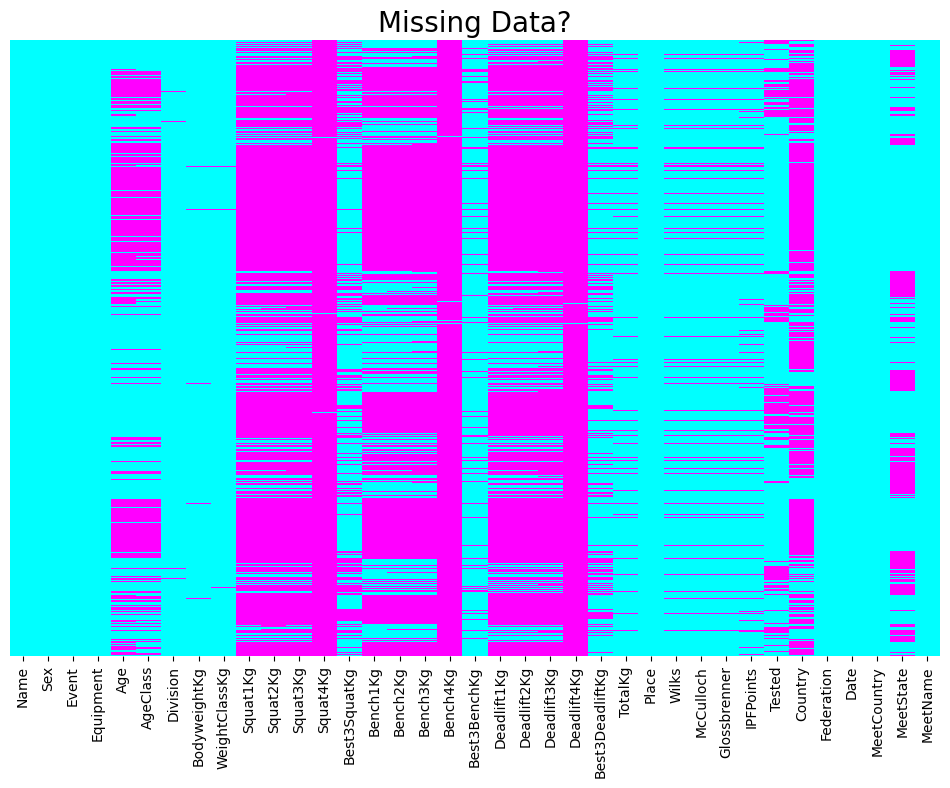

In [5]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='cool',cbar=False,yticklabels=False)
plt.title('Missing Data?',fontsize=20)
plt.show()

The '4Kg' columns look incomplete. Age also looks pretty patchy. Going to drop the '4Kg' columns but keep the 'Age column

In [4]:
df.drop(['Squat4Kg','Bench4Kg','Deadlift4Kg'],axis=1,inplace=True)

In [5]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [6]:
df['Name'].value_counts()[:10]

Alan Aerts         214
Jose Hernandez     204
Sverre Paulsen     191
Erik Rasmussen     186
Bonnie Aerts       165
Zbyněk Krejča      154
Bjørn Grønvold     154
Jackie Blasbery    150
Max Bristow        147
Hana Takáčová      145
Name: Name, dtype: int64

There doesn't seem to be a good column in the openpowerlifting.csv dataset to use for eliminating duplicate data. For example, notice that the most unique column, Name, has nearly 215 instances of 'Alan Aerts'. And that is not to say that we are talking about the same single person, though we probably are.

#### More Processing

In [7]:
print('Number of unique divisions: ' + str(df['Division'].nunique()))

Number of unique divisions: 4842


There seems to be too many unique Divisions to effectively group the data by the Division column. Maybe manually grouping the data by other criterion would work better.

##### Classing by Age

In [8]:
def age_class(x):
    if x < 13:
        return 'CHILD'
    if x >= 13 and x <= 17:
        return 'YOUTH'
    if x >= 18 and x <= 34:
        return 'ADULT'
    if x >= 35:
        return 'MASTERS'

In [9]:
df['AgeClass'] = df['Age'].apply(age_class)

##### Relative Strength - The Bodyweight Multiplier

As you will see, lifters that weigh more tend to lift more too. I will create a few more columns that reflect how many times a weightlifter can lift his/her own weight. The formula is simply...

BestliftKg / body weight = lift / BW

By seeing how many times a lifter can lift his/her own weight, we will get another sense of someone's strength.

In [10]:
def squatBody(x):
    return x['Best3SquatKg']/ x['BodyweightKg']

def benchBody(x):
    return x['Best3BenchKg'] / x['BodyweightKg']

def deadliftBody(x):
    return x['Best3DeadliftKg'] / x['BodyweightKg']

def totalLiftBody(x):
    return x['TotalKg'] / x['BodyweightKg']


In [11]:
df['Squat / BW'] = df.apply(squatBody,axis=1)
df['Bench / BW'] = df.apply(benchBody,axis=1)
df['Deadlift / BW'] = df.apply(deadliftBody,axis=1)
df['Total / BW'] = df.apply(totalLiftBody,axis=1)

##### Bodyweight Classing by Sex

Let's make a division by weight. These are the weight classes according to the International Weightlifting Federation. Please note: the IWF focuses mostly on olypmic-style weightlifting, which consists of the snatch, clean, and clean and jerk. This dataset doesn't have those lifts, and instead has the squat, bench and deadlift. I'm sure someone really into the sport is outraged that I am combining IWF classes with lifts not typically associated with the IWF. Please for give me :)

Men Weight Classes

56 kg (123 lb); 62 kg (137 lb); 69 kg (152 lb); 77 kg (170 lb); 85 kg (187 lb); 94 kg (207 lb); 105 kg (231 lb); 105 kg and over (231 lb+)


Women Weight Classes

48 kg (106 lb); 53 kg (117 lb); 58 kg (128 lb); 63 kg (139 lb); 69 kg (152 lb); 75 kg (165 lb); 90 kg (198 lb); 90 kg and over (198 lb+)[1]

In [28]:
male = df[df['Sex']=='M']
print(male)
female = df[df['Sex']=='F']

                       Name Sex Event Equipment   Age AgeClass   Division  \
41             Adrian Zwaan   M   SBD       Raw  80.0  MASTERS       M-OR   
42            Aiden Westrip   M   SBD     Wraps  28.0    ADULT       M-OR   
43             Andrew Fella   M   SBD     Wraps  27.0    ADULT       M-OR   
44             Andrew Yuile   M   SBD     Wraps  36.0  MASTERS       M-OR   
45         Anthony Provenza   M   SBD     Wraps  34.0    ADULT       M-OR   
...                     ...  ..   ...       ...   ...      ...        ...   
1423349      Marian Cafalik   M   SBD       Raw  60.5  MASTERS  Masters 2   
1423350  Marian Piwowarczyk   M   SBD       Raw  55.5  MASTERS  Masters 2   
1423351  Andrzej Bryniarski   M   SBD       Raw  62.5  MASTERS  Masters 2   
1423352  Stanisław Goroczko   M   SBD       Raw  63.5  MASTERS  Masters 2   
1423353            Jan Sowa   M   SBD       Raw  70.5  MASTERS  Masters 2   

         BodyweightKg WeightClassKg  Squat1Kg  ...  Country  Federation  \


In [13]:
def male_weight_class(x):
    if x <= 56:
        return '56 kg'
    if x <= 62 and x > 56:
        return '62 kg'
    if x <= 69 and x > 62:
        return '69 kg'
    if x <= 77 and x > 69:
        return '77 kg'
    if x <= 85 and x > 77:
        return '85 kg'
    if x <= 94 and x > 85:
        return '94 kg'
    if x <= 105 and x > 94:
        return "105 kg"
    if x > 105:
        return '105+ kg'



def female_weight_class(x):
    if x <= 48:
        return '48 kg'
    if x <= 53 and x > 48:
        return '53 kg'
    if x <= 58 and x > 53:
        return '58 kg'
    if x <= 63 and x > 58:
        return '63 kg'
    if x <= 69 and x > 63:
        return '69 kg'
    if x <= 75 and x > 69:
        return '75 kg'
    if x <= 90 and x > 75:
        return "90 kg"
    if x > 90:
        return '90+ kg'
    

In [14]:
male['WeightClassKg'] = male['BodyweightKg'].apply(male_weight_class)
female['WeightClassKg'] = female['BodyweightKg'].apply(female_weight_class)

/tmp/ipykernel_573/3676673241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['WeightClassKg'] = male['BodyweightKg'].apply(male_weight_class)
/tmp/ipykernel_573/3676673241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['WeightClassKg'] = female['BodyweightKg'].apply(female_weight_class)


In [15]:
df = pd.concat([male,female])

##### Negative lifts?

In [16]:
df[df['Best3BenchKg']<0].head(3)

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Country,Federation,Date,MeetCountry,MeetState,MeetName,Squat / BW,Bench / BW,Deadlift / BW,Total / BW
309,Justin Faella,M,SBD,Wraps,30.0,ADULT,M-OR,73.8,77 kg,150.0,...,Australia,GPC-AUS,2015-05-19,Australia,NaN,Nationals,2.201897,-1.355014,2.981030,NaN
3470,Brendan Hains,M,SBD,Multi-ply,44.0,MASTERS,M-OE,95.1,105 kg,250.0,...,Australia,GPC-AUS,2013-03-17,Australia,VIC,Victoria States,2.839117,-2.155626,2.733964,NaN
5607,Garth Bolitho,M,SBD,Wraps,33.0,ADULT,M-OR,114.3,105+ kg,215.0,...,NaN,GPC-AUS,2013-04-06,Australia,QLD,QLD State Titles,2.230971,-1.356080,2.099738,NaN


A negative in weightlifting is when you apply resistance to the weight as gravity brings it down. So as you lower the weight, you apply controlled resistance to the weight over time (normally three seconds) until it comes down, and then drive the weight back up. This kind of training is normally done on lighter weights and is said to have strength benefits.

However, I don't believe competitions to include negative lifts by just documenting a negative number instead of a positive number. Is this something that I should just drop, apply a function that inserts a Nan value for the nevative values?

In [19]:
negative_lifts = len(df[(df['Best3BenchKg']<0) | (df['Best3DeadliftKg']<0) | (df['Best3SquatKg']<0)]) / len(df)

print('Percent chance of one or more lift values to be negative: {}%'.format(negative_lifts*100))

Percent chance of one or more lift values to be negative: 0.26388375625459304%


Considering how much work it would be to convert all the negative lifts into Nan values, recalculate the 'TotalKg' values and the 'Wilks' values too... I would rather just drop those values, seeing that less than 1% of the dataframe is effected by this glitch.

In [20]:
#Make sure to only drop negatives. We want to keep NaN values.

df = df[(df['Best3SquatKg'] > 0) | (df['Best3SquatKg'].isnull() == True)]
df = df[(df['Best3DeadliftKg'] > 0) | (df['Best3DeadliftKg'].isnull() == True)]
df = df[(df['Best3BenchKg'] > 0) | (df['Best3BenchKg'].isnull() == True)]

##### Simple Exploratory Data Analysis

This section is self explaintory. We will only review a variable or two at a time here. Some of the variables will include gender, bodyweight, age and equipment. We are just getting a feel for the data here. We won't look into overall strength measures until later.

#### Gender

/tmp/ipykernel_573/509598262.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


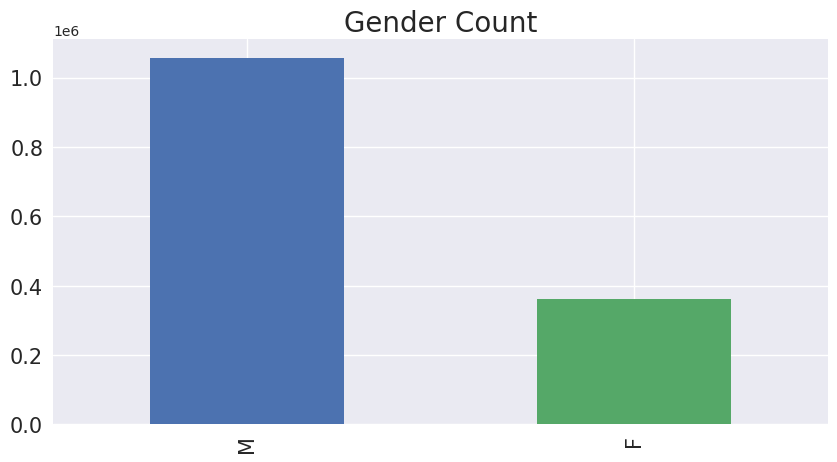

Percentage of Male lifters: 74%

M    1057092
F     362506
Name: Sex, dtype: int64


In [48]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
df['Sex'].value_counts().plot(kind='bar', color=["C0","C1"])
plt.title('Gender Count',fontsize=20)
plt.yticks(np.arange(0,1200000,200000),fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('Percentage of Male lifters: {}%\n'.format(round(len(df[df['Sex']=='M'])/len(df)*100),4))
print(df['Sex'].value_counts())

This isn't very surprising. Males make up around 74 % of the data.

##### Equipment

In [43]:
print(df['Equipment'].value_counts())

Single-ply    785761
Raw           465804
Wraps         103206
Multi-ply      64809
Straps            18
Name: Equipment, dtype: int64


Since Straps and Wraps appear to be the same thing, let's just combine Straps into Wraps. Here is a great article about the differences between raw lifting and ply lifting.

In [44]:
#Convert all 'Straps' instances into 'Wraps' instances.

def convert_equipment(x):
    if x == "Straps":
        return "Wraps"
    return x

In [45]:
df['Equipment']= df['Equipment'].apply(convert_equipment)

/tmp/ipykernel_573/3795838353.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


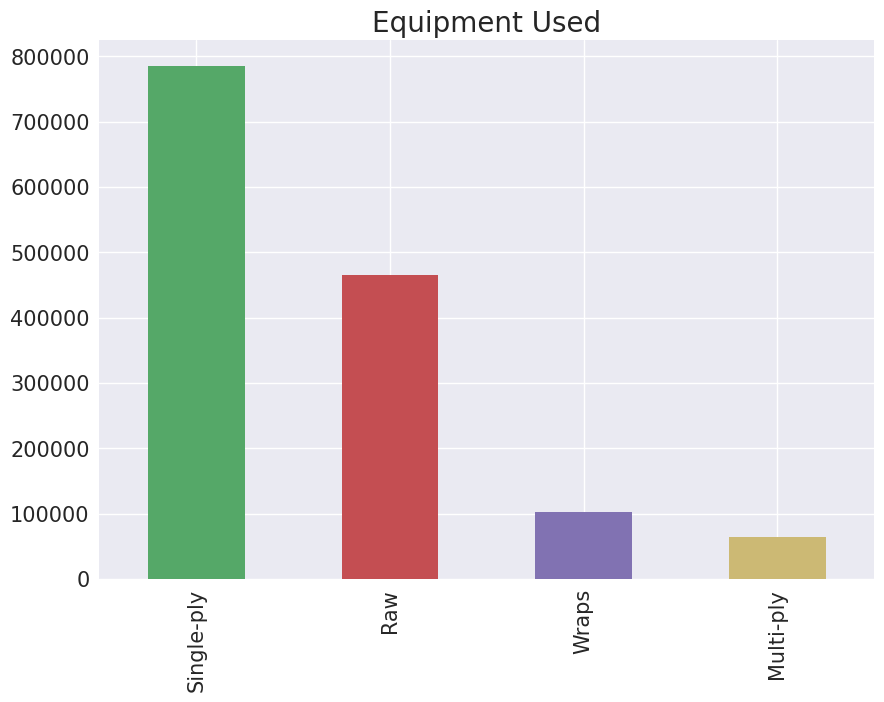

Equipment used: 

Single-ply    785761
Raw           465804
Wraps         103224
Multi-ply      64809
Name: Equipment, dtype: int64


In [47]:
plt.style.use('seaborn')
plt.figure(figsize=(10,7))
df['Equipment'].value_counts().plot(kind='bar', color=['C1','C2','C3','C4'])
plt.title('Equipment Used',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('Equipment used: \n')
print(df['Equipment'].value_counts())

##### Age

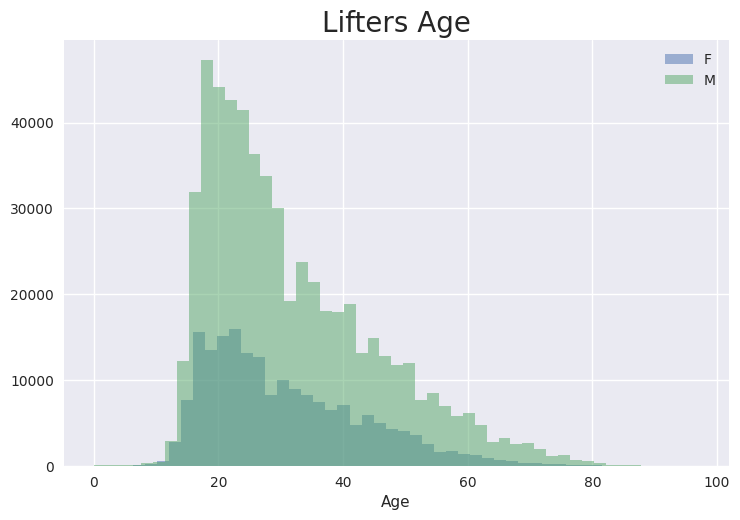

In [57]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True, height=5)
g = g.map(plt.hist,'Age',bins=50,alpha=.5)
plt.title('Lifters Age',fontsize=20)
plt.legend(loc=1)
plt.show()

Seems that were are quite a few lifters under the age of 15 and over the age of 80. Let's see some mins and maxs.

In [58]:
df[df['Age']==5]

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
69319,Collin Ralls,M,D,Raw,5.0,5-12,Youth,27.22,39,NaN,...,52.40,30.44,NaN,Yes,NaN,APA,2019-02-23,USA,AR,Iron Disorder Near the Border
124585,Austin Myers,M,B,Single-ply,5.0,5-12,Masters 65-69,90.00,90,NaN,...,142.77,79.53,430.89,NaN,USA,WPA,1996-03-16,Canada,QC,World Championships
142098,Frank White,M,SBD,Single-ply,5.0,5-12,Masters 55-59,75.00,75,NaN,...,458.51,256.37,357.70,Yes,NaN,ADFPA,1993-04-06,USA,MS,Mississippi State
178607,Matthew Martinez,M,D,Raw,5.0,5-12,Y 5,30.00,30,NaN,...,57.76,33.55,NaN,Yes,NaN,AAU,2017-02-25,USA,CA,So Cal Meet
199419,Travis Webster,M,B,Raw,5.0,5-12,Under 17,82.50,82.5,NaN,...,60.84,33.95,213.93,Yes,NaN,PA,2002-01-01,Australia,NaN,Australian Schools Postal Bench Press
224996,Aaron Ellis,M,S,Raw,5.0,5-12,Youth Under 6,20.00,30,11.34,...,41.91,24.35,NaN,Yes,NaN,ADAU,2006-07-22,USA,NY,Single Lift Nationals
225016,Aaron Ellis,M,B,Raw,5.0,5-12,Youth Under 6,20.00,30,NaN,...,26.20,15.22,NaN,Yes,NaN,ADAU,2006-07-22,USA,NY,Single Lift Nationals
225044,Aaron Ellis,M,D,Raw,5.0,5-12,Youth Under 6,20.00,30,NaN,...,68.11,39.56,NaN,Yes,NaN,ADAU,2006-07-22,USA,NY,Single Lift Nationals
627788,Jacob Stone #2,M,B,Raw,5.0,5-12,M_Guest,20.60,52,NaN,...,17.33,10.07,NaN,NaN,NaN,APF,2018-04-14,USA,IL,Pressing the Pieces Together
655941,Sonya Stengel,F,D,Raw,5.0,5-12,Youth,43.09,44,NaN,...,61.74,32.09,90.87,Yes,USA,RAW,2018-04-08,USA,OH,Tri State Championships


In [59]:
df[df['Age']==95]

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
177432,John Gilmour,M,B,Raw,95.0,80-999,RLM 95-99,90.00,90,NaN,...,135.93,46.14,288.42,Yes,USA,AAU,2017-03-18,USA,CA,American Meet
177433,John Gilmour,M,B,Raw,95.0,80-999,RM 95-99,90.00,90,NaN,...,135.93,46.14,288.42,Yes,USA,AAU,2017-03-18,USA,CA,American Meet
178701,John Gilmour,M,B,Raw,95.0,80-999,M 95-99,86.45,90,NaN,...,138.86,47.17,296.27,Yes,USA,AAU,2017-09-15,USA,NV,World Powerlifting Championships


Couple of young boys at the age of 5. Notice that these young boys only did one lift, which was the deadlift. Hmmm.

Incredible!! There are a couple of men lifting at the age of 95. Also, notice that these older men only did the Bench. Hmmm.

I assume the reason for this is safety.

##### Bodyweight

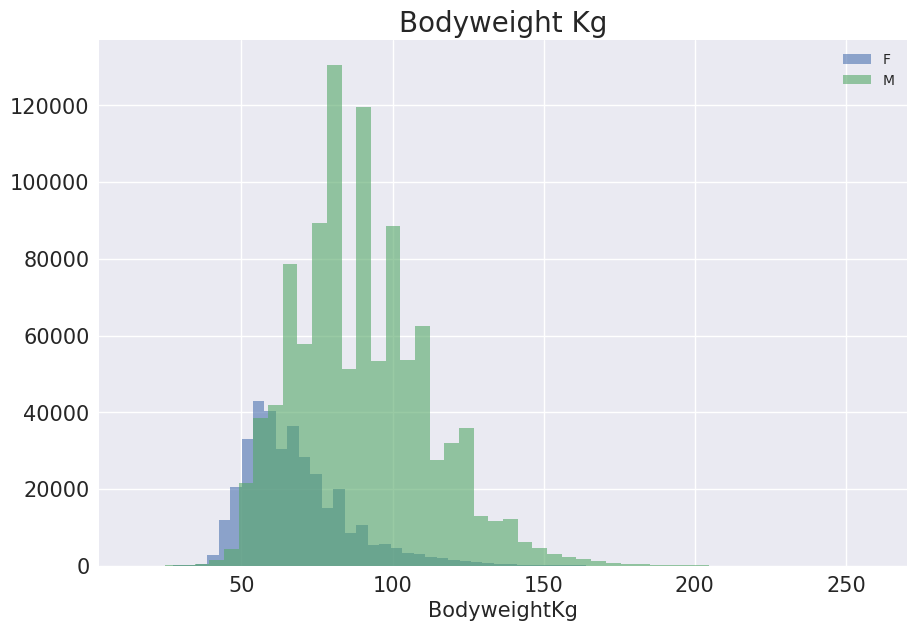

In [61]:
g = sns.FacetGrid(df,hue='Sex',height=6,aspect=1.5,legend_out=True)
g = g.map(plt.hist,'BodyweightKg',bins=50,alpha=.6)
plt.title('Bodyweight Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.legend(loc=1)
plt.show()

Male weightlifters are heavier then female weightlifters, according to this histogram.

##### Absolute Strength
Absolute strength is simply most weight lifted. In this section we'll look at absolute strength by bodyweight and equipment and absolute strength by gender.

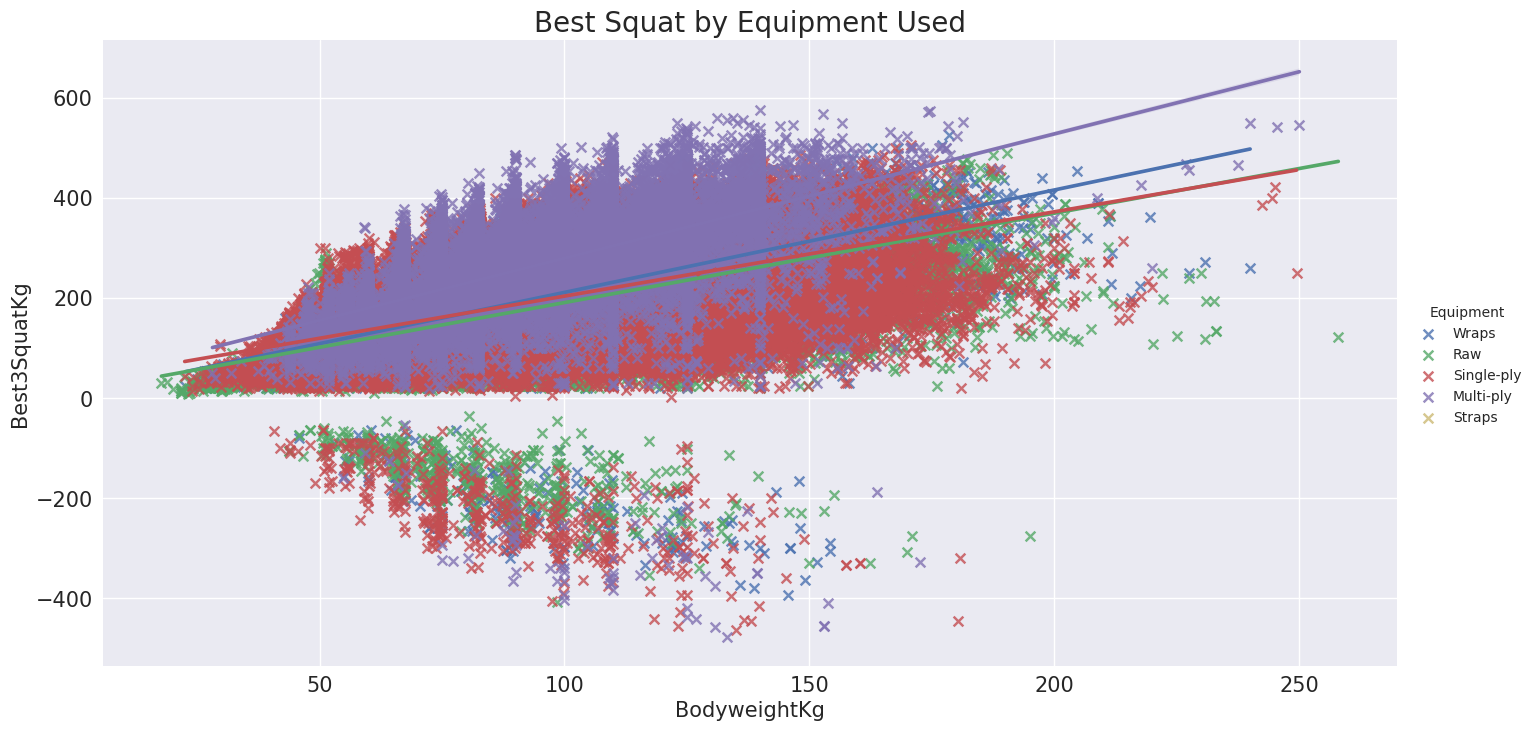

Equipment Used by Lifters:

Single-ply    787141
Raw           467421
Wraps         103739
Multi-ply      65035
Straps            18
Name: Equipment, dtype: int64


In [74]:
sns.lmplot(x='BodyweightKg',
           y='Best3SquatKg',
           data=df,
           hue='Equipment',
           markers='x',
           height=7,
           aspect=2)
plt.title('Best Squat by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Best3SquatKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

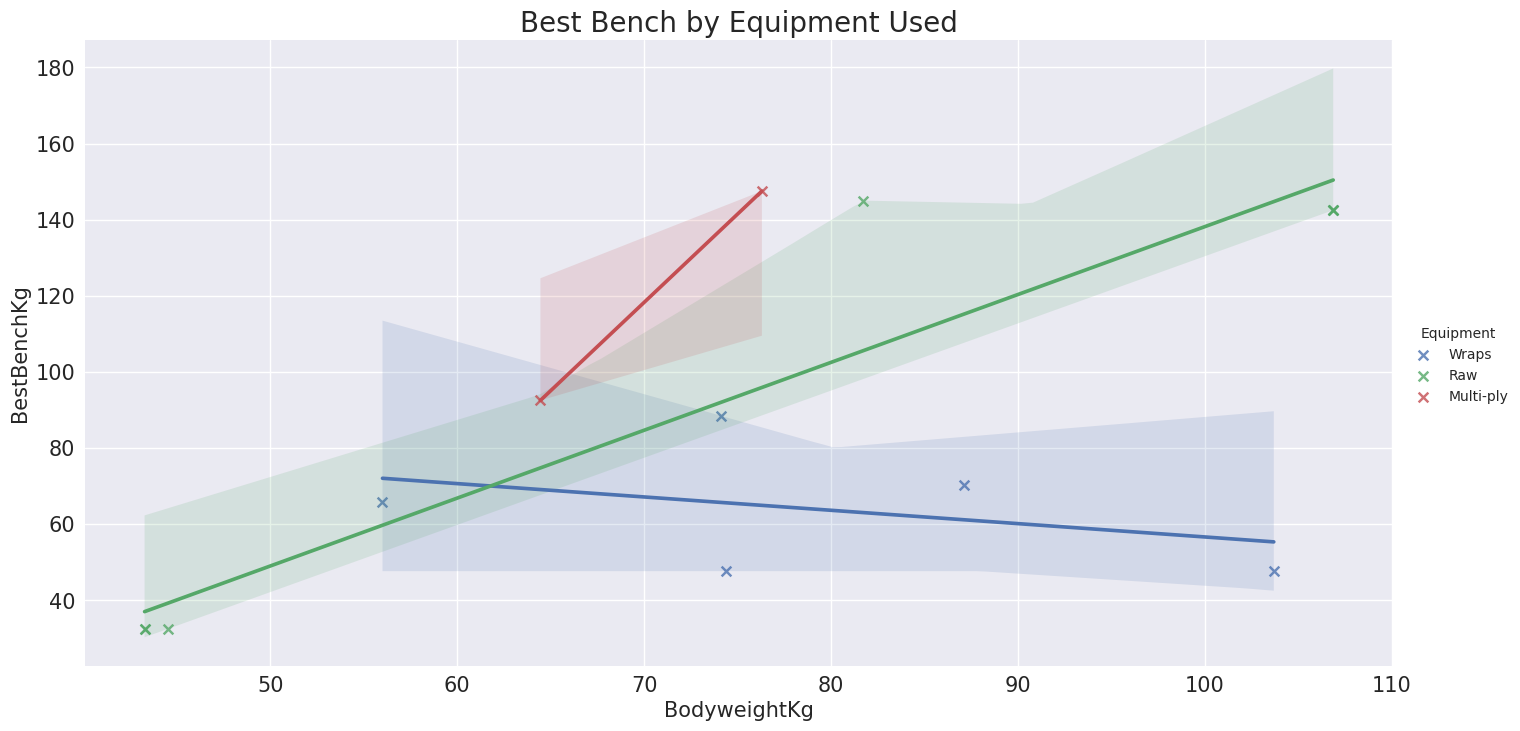

Equipment Used by Lifters:

Single-ply    787141
Raw           467421
Wraps         103739
Multi-ply      65035
Straps            18
Name: Equipment, dtype: int64


In [70]:
sns.lmplot(x='BodyweightKg',
           y='Best3BenchKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           height=7,
           aspect=2)
plt.title('Best Bench by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('BestBenchKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())